In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [85]:
tf.__version__

'1.13.1'

In [86]:
#Importing and allocating data to x and y, train and test

mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [87]:
print("Shape or x_train",x_train.shape)
print("Shape or y_train",y_train.shape)
print("Shape or x_test",x_test.shape)
print("Shape or y_test",y_test.shape)

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


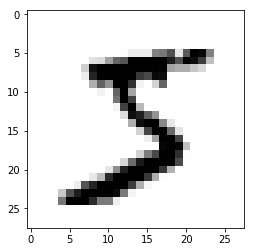

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [89]:
y_train[0]

5

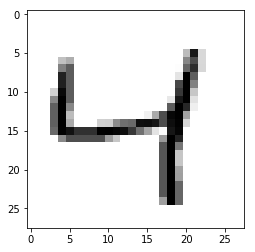

In [90]:
plt.imshow(x_train[2], cmap = plt.cm.binary)

In [91]:
y_train[2]

4

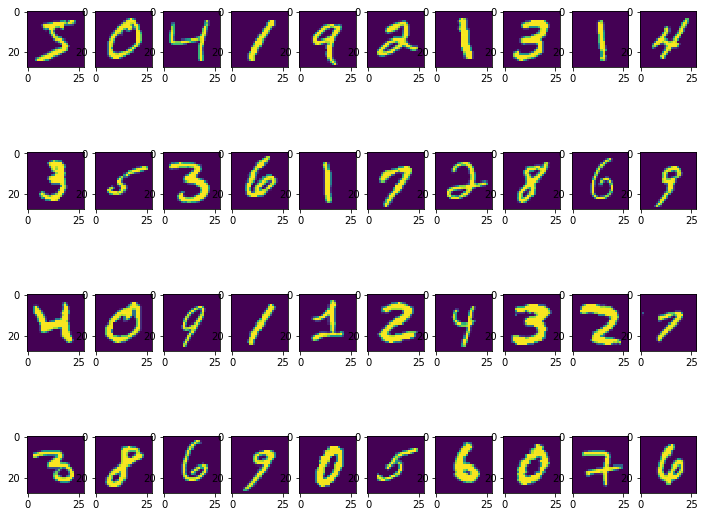

In [92]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [93]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [94]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [95]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [96]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(x_train, y_train, 
                                                test_size = 0.2,
                                                random_state = 42)

In [98]:
X_train.shape, X_cv.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [99]:
# The pixel intensity range

min(x_train[0]), max(x_train[0])

(0, 255)

In [100]:
# The pixel intensity range

min(x_train.min(axis=0)), max(x_train.max(axis=0))

(0, 255)

In [101]:
# Feature Normalization 

X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); x_test = x_test.astype('float32')
X_train /= 255; X_cv /= 255; x_test /= 255

# Convert labels to One Hot Encoded

num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [102]:
# Printing 2 examples of labels after conversion
print(y_train[0]) # 2
print(y_train[3]) # 7

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [103]:
'''Model 1: Simple Neural Network with 4 layers (300, 100, 100, 200)

In our first model, we will use the Keras library to train a neural network with the activation function set as ReLu. 
To determine which class to output, we will rely on the SoftMax function'''

# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [104]:
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(hidden_layer3)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer4)

In [105]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer

model = Model(input_layer, output_layer)
model.summary() # We have 297,910 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_54 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Insert Hyperparameters

learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

In [107]:
# We rely on the plain vanilla Stochastic Gradient Descent as our optimizing methodology

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [108]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 1.4795 - acc: 0.5810 - val_loss: 0.6432 - val_acc: 0.8265
Epoch 2/20
 - 2s - loss: 0.4755 - acc: 0.8676 - val_loss: 0.3780 - val_acc: 0.8922
Epoch 3/20
 - 2s - loss: 0.3409 - acc: 0.9021 - val_loss: 0.3112 - val_acc: 0.9103
Epoch 4/20
 - 3s - loss: 0.2890 - acc: 0.9164 - val_loss: 0.2751 - val_acc: 0.9207
Epoch 5/20
 - 2s - loss: 0.2557 - acc: 0.9261 - val_loss: 0.2436 - val_acc: 0.9319
Epoch 6/20
 - 3s - loss: 0.2299 - acc: 0.9336 - val_loss: 0.2232 - val_acc: 0.9366
Epoch 7/20
 - 2s - loss: 0.2095 - acc: 0.9399 - val_loss: 0.2079 - val_acc: 0.9403
Epoch 8/20
 - 3s - loss: 0.1919 - acc: 0.9447 - val_loss: 0.1893 - val_acc: 0.9467
Epoch 9/20
 - 2s - loss: 0.1762 - acc: 0.9486 - val_loss: 0.1796 - val_acc: 0.9479
Epoch 10/20
 - 3s - loss: 0.1637 - acc: 0.9524 - val_loss: 0.1708 - val_acc: 0.9507
Epoch 11/20
 - 3s - loss: 0.1514 - acc: 0.9558 - val_loss: 0.1611 - val_acc: 0.9536
Epoch 12/20
 - 3s - loss: 0.1421 - 

In [109]:
'''Using a 4 layer neural network with:

20 training epochs
A training batch size of 100
Hidden layers set as (300, 100, 100, 200)
Learning rate of 0.1
Achieved a training score of around 96% and a test score of around 97%.

Can we do better if we were to change the optimizer? To find out, we use the Adam optimizer for our second model, 
while maintaining the same parameter values for all other parameters.'''

'Using a 4 layer neural network with:\n\n20 training epochs\nA training batch size of 100\nHidden layers set as (300, 100, 100, 200)\nLearning rate of 0.1\nAchieved a training score of around 96% and a test score of around 97%.\n\nCan we do better if we were to change the optimizer? To find out, we use the Adam optimizer for our second model, \nwhile maintaining the same parameter values for all other parameters.'

In [110]:
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(hidden_layer3)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer4)

# We rely on ADAM as our optimizing methodology
adam = keras.optimizers.Adam(lr=learning_rate)
model2 = Model(input_layer, output_layer)

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 5s - loss: 0.2920 - acc: 0.9139 - val_loss: 0.1466 - val_acc: 0.9560
Epoch 2/20
 - 4s - loss: 0.1111 - acc: 0.9665 - val_loss: 0.1040 - val_acc: 0.9685
Epoch 3/20
 - 3s - loss: 0.0761 - acc: 0.9765 - val_loss: 0.0871 - val_acc: 0.9747
Epoch 4/20
 - 3s - loss: 0.0540 - acc: 0.9826 - val_loss: 0.1017 - val_acc: 0.9707
Epoch 5/20
 - 3s - loss: 0.0423 - acc: 0.9869 - val_loss: 0.0948 - val_acc: 0.9742
Epoch 6/20
 - 4s - loss: 0.0350 - acc: 0.9886 - val_loss: 0.0916 - val_acc: 0.9763
Epoch 7/20
 - 3s - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0937 - val_acc: 0.9770
Epoch 8/20
 - 3s - loss: 0.0290 - acc: 0.9906 - val_loss: 0.0931 - val_acc: 0.9775
Epoch 9/20
 - 3s - loss: 0.0248 - acc: 0.9920 - val_loss: 0.0858 - val_acc: 0.9797
Epoch 10/20
 - 4s - loss: 0.0187 - acc: 0.9935 - val_loss: 0.1185 - val_acc: 0.9775
Epoch 11/20
 - 4s - loss: 0.0185 - acc: 0.9942 - val_loss: 0.1094 - val_acc: 0.9755
Epoch 12/20
 - 3s - loss: 0.0173 - 

In [112]:
'''As it turns out, it does appear to be the case that the optimizer plays a crucial part in the validation score. 
In particular, the model which relies on 'Adam' as its optimizer tend to perform 1.5 - 2.5% better on average. 
Going forward, we will use 'Adam' as our optimizer of choice.

What if we changed the learning rate from 0.1 to 0.01, or 0.5? Will it have any impact on the accuracy? Model 2A'''

"As it turns out, it does appear to be the case that the optimizer plays a crucial part in the validation score. \nIn particular, the model which relies on 'Adam' as its optimizer tend to perform 1.5 - 2.5% better on average. \nGoing forward, we will use 'Adam' as our optimizer of choice.\n\nWhat if we changed the learning rate from 0.1 to 0.01, or 0.5? Will it have any impact on the accuracy? Model 2A"

In [113]:
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(hidden_layer3)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer4)

learning_rate = 0.01
adam = keras.optimizers.Adam(lr=learning_rate)
model2a = Model(input_layer, output_layer)

model2a.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [114]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 2,
                        validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 5s - loss: 0.2866 - acc: 0.9145 - val_loss: 0.1272 - val_acc: 0.9612
Epoch 2/20
 - 4s - loss: 0.1049 - acc: 0.9687 - val_loss: 0.0985 - val_acc: 0.9678
Epoch 3/20
 - 4s - loss: 0.0723 - acc: 0.9776 - val_loss: 0.0911 - val_acc: 0.9733
Epoch 4/20
 - 4s - loss: 0.0527 - acc: 0.9841 - val_loss: 0.0877 - val_acc: 0.9745
Epoch 5/20
 - 4s - loss: 0.0383 - acc: 0.9880 - val_loss: 0.0923 - val_acc: 0.9759
Epoch 6/20
 - 4s - loss: 0.0342 - acc: 0.9886 - val_loss: 0.0918 - val_acc: 0.9762
Epoch 7/20
 - 4s - loss: 0.0279 - acc: 0.9905 - val_loss: 0.1035 - val_acc: 0.9735
Epoch 8/20
 - 4s - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0992 - val_acc: 0.9748
Epoch 9/20
 - 4s - loss: 0.0225 - acc: 0.9925 - val_loss: 0.0981 - val_acc: 0.9769
Epoch 10/20
 - 4s - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0971 - val_acc: 0.9776
Epoch 11/20
 - 4s - loss: 0.0185 - acc: 0.9940 - val_loss: 0.0982 - val_acc: 0.9785
Epoch 12/20
 - 4s - loss: 0.0156 - 

In [115]:
# Model 2B

input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(hidden_layer3)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer4)

learning_rate = 0.5
adam = keras.optimizers.Adam(lr=learning_rate)
model2b = Model(input_layer, output_layer)

model2b.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [116]:
history2b = model2b.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                            validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.2858 - acc: 0.9155 - val_loss: 0.1423 - val_acc: 0.9566
Epoch 2/20
48000/48000 [==============================] - 4s 78us/step - loss: 0.1080 - acc: 0.9663 - val_loss: 0.1093 - val_acc: 0.9666
Epoch 3/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0726 - acc: 0.9772 - val_loss: 0.0947 - val_acc: 0.9721
Epoch 4/20
48000/48000 [==============================] - 4s 78us/step - loss: 0.0513 - acc: 0.9835 - val_loss: 0.1120 - val_acc: 0.9701
Epoch 5/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.0455 - acc: 0.9855 - val_loss: 0.0812 - val_acc: 0.9782
Epoch 6/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0332 - acc: 0.9893 - val_loss: 0.0894 - val_acc: 0.9758
Epoch 7/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0312 - acc: 0.9893 - val_loss: 0.0814 - val_ac

In [117]:
'''The accuracy, as measured by the 3 different learning rates 0.01, 0.1 and 0.5 are around 98%. 
As there are no considerable gains by changing the learning rates, we stick with the default learning rate of 0.1.

We proceed to fit a neural network with 5 hidden layers with the features in the hidden layer set as (300, 100, 100, 100, 200) respectively. 
To ensure that the two models are comparable, we will set the training epochs as 20, and the training batch size as 100.'''

'The accuracy, as measured by the 3 different learning rates 0.01, 0.1 and 0.5 are around 98%. \nAs there are no considerable gains by changing the learning rates, we stick with the default learning rate of 0.1.\n\nWe proceed to fit a neural network with 5 hidden layers with the features in the hidden layer set as (300, 100, 100, 100, 200) respectively. \nTo ensure that the two models are comparable, we will set the training epochs as 20, and the training batch size as 100.'

In [118]:
# Input Parameters

n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 100
n_hidden_5 = 200
num_digits = 10

In [119]:
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(hidden_layer3)
hidden_layer5 = Dense(n_hidden_5, activation='relu')(hidden_layer4)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer5)

learning_rate = 0.1
adam = keras.optimizers.Adam(lr=learning_rate)
model2b = Model(input_layer, output_layer)

model2b.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [120]:
# Our model would have '7' layers - input layer, 5 hidden layer and 1 output layer
model3 = Model(input_layer, output_layer)
model3.summary() # We have 308,010 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_74 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                2010      
Total para

In [121]:
# We rely on 'Adam' as our optimizing methodology
adam = keras.optimizers.Adam(lr=0.01)

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
history3 = model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 123us/step - loss: 0.2984 - acc: 0.9100 - val_loss: 0.1297 - val_acc: 0.9599
Epoch 2/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.1123 - acc: 0.9659 - val_loss: 0.1109 - val_acc: 0.9668
Epoch 3/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0752 - acc: 0.9770 - val_loss: 0.0949 - val_acc: 0.9737
Epoch 4/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.1006 - val_acc: 0.9728
Epoch 5/20
48000/48000 [==============================] - 5s 95us/step - loss: 0.0466 - acc: 0.9850 - val_loss: 0.0780 - val_acc: 0.9781
Epoch 6/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0366 - acc: 0.9882 - val_loss: 0.0776 - val_acc: 0.9779
Epoch 7/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0331 - acc: 0.9897 - val_loss: 0.0964 - val_ac

In [123]:
'''Compared to our first model, adding an additional layer did not significantly improve the accuracy from our previous model. 
However, there are computational costs (in terms of complexity) in implementing an additional layer in our neural network. 
Given that the benefits of an additional layer are low while the costs are high, we will stick with the 4 layer neural network.

We now proceed to include dropout (dropout rate of 0.3) in our second model to prevent overfitting.'''

'Compared to our first model, adding an additional layer did not significantly improve the accuracy from our previous model. \nHowever, there are computational costs (in terms of complexity) in implementing an additional layer in our neural network. \nGiven that the benefits of an additional layer are low while the costs are high, we will stick with the 4 layer neural network.\n\nWe now proceed to include dropout (dropout rate of 0.3) in our second model to prevent overfitting.'

In [124]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [125]:
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(n_hidden_1, activation='relu')(input_layer)
dropout_1 = Dropout(0.3)(hidden_layer1)
hidden_layer2 = Dense(n_hidden_2, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(hidden_layer2)
hidden_layer3 = Dense(n_hidden_3, activation='relu')(dropout_2)
dropout_3 = Dropout(0.3)(hidden_layer3)
hidden_layer4 = Dense(n_hidden_4, activation='relu')(dropout_3)
output_layer = Dense(num_digits, activation='softmax')(hidden_layer4)

In [126]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer

model4 = Model(input_layer, output_layer)
model4.summary() # We have 297,910 parameters to estimate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
__________

In [127]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
history = model4.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = training_epochs,
                    validation_data=(X_cv, y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 136us/step - loss: 0.4914 - acc: 0.8466 - val_loss: 0.1687 - val_acc: 0.9508
Epoch 2/20
48000/48000 [==============================] - 5s 109us/step - loss: 0.2066 - acc: 0.9413 - val_loss: 0.1286 - val_acc: 0.9620
Epoch 3/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.1590 - acc: 0.9542 - val_loss: 0.1061 - val_acc: 0.9690
Epoch 4/20
48000/48000 [==============================] - 5s 95us/step - loss: 0.1319 - acc: 0.9631 - val_loss: 0.0961 - val_acc: 0.9715
Epoch 5/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.1108 - acc: 0.9681 - val_loss: 0.0979 - val_acc: 0.9706
Epoch 6/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.0991 - acc: 0.9718 - val_loss: 0.0856 - val_acc: 0.9764
Epoch 7/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.0921 - acc: 0.9730 - val_loss: 0.0789 - val

In [129]:
'''With a validation score of close > 98%, we proceed to use this model to predict for the test set.'''

'With a validation score of close > 98%, we proceed to use this model to predict for the test set.'

In [130]:
test_pred = pd.DataFrame(model4.predict(x_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [131]:
'''Using this model, we are able to achieve a score of 0.9817'''

'Using this model, we are able to achieve a score of 0.9817'

In [132]:
y_test = y_test.astype('int64')
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [133]:
test_pred.Label.head()

0    7
1    2
2    1
3    0
4    4
Name: Label, dtype: int64

In [134]:
test_pred['Errors'] = (test_pred.Label - y_test != 0)

In [135]:
test_pred['Errors'].value_counts()

False    9809
True      191
Name: Errors, dtype: int64